<a href="https://colab.research.google.com/github/Haidarly2/PCVK_Semester_5/blob/main/Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JobSheet 11**

Informasi Diri
- Nama : Haidar Aly
- Kelas : TI-3F
- Absen : 09
- NIM : 2241720258

Link Github
- Link :

## **Object Detection**

Metode yang digunakan :
1. Template Matching
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour Detection

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import match_template

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Template Matching**
Menggunakan library openCV
**cv.matchTemplate()**
</br>
</br>
Jenis method template yang digunakan
1. TM_SQDIFF
2. TM_SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR_NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED


In [3]:
# Load image and template, convert to grayscale
def load_and_convert_to_gray(image_path, template_path):
    img = cv.imread(image_path)
    template = cv.imread(template_path)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    return img, img_gray, template, template_gray

# Display input and template images
def display_input_and_template(img, template):
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axarr[0].set_title("Input Image")
    axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
    axarr[1].set_title("Template Image")
    plt.show()

# Perform template matching for each method
def apply_template_matching(img_gray, template_gray, template_width, template_height, methods):
    for method in methods:
        # Get method by eval to use the actual OpenCV function
        method_eval = eval(method)
        result = cv.matchTemplate(img_gray, template_gray, method_eval)
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

        # Determine the top-left corner based on the matching method
        top_left = min_loc if method_eval in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else max_loc
        bottom_right = (top_left[0] + template_width, top_left[1] + template_height)

        # Draw rectangle on the matching region
        match_img = img.copy()
        cv.rectangle(match_img, top_left, bottom_right, (0, 255, 0), 2)

        # Display results
        display_results(result, match_img, method)

# Display matching results
def display_results(result, match_img, method):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(result, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(match_img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

    plt.suptitle(method, fontsize=20)
    plt.show()

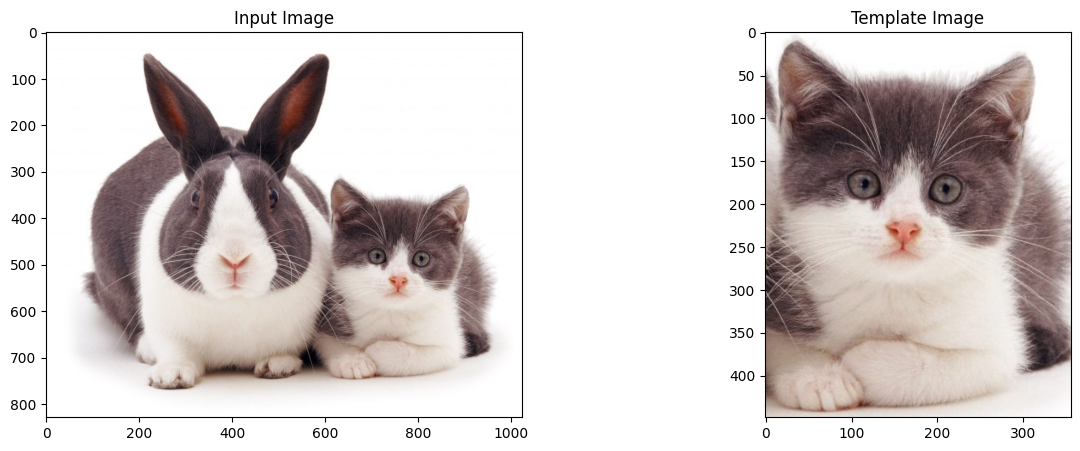

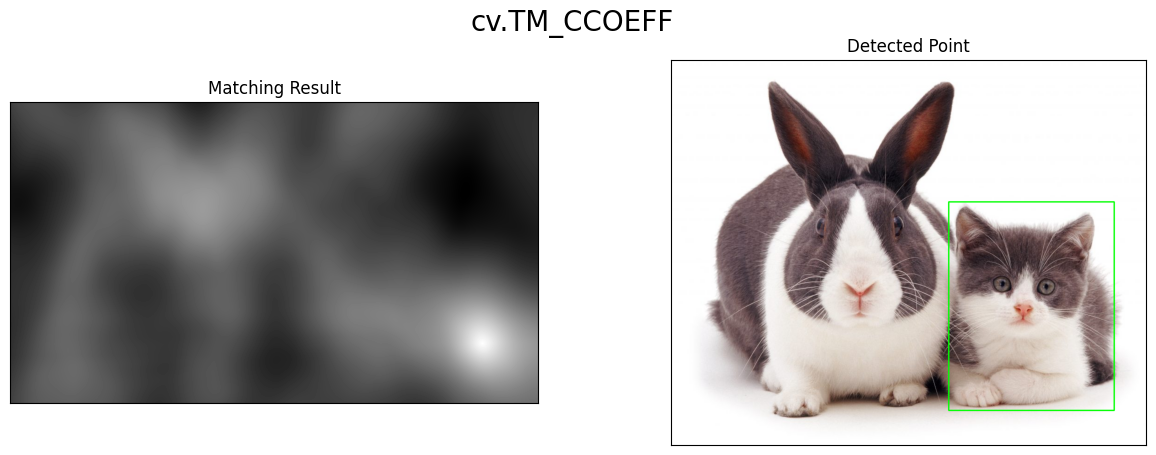

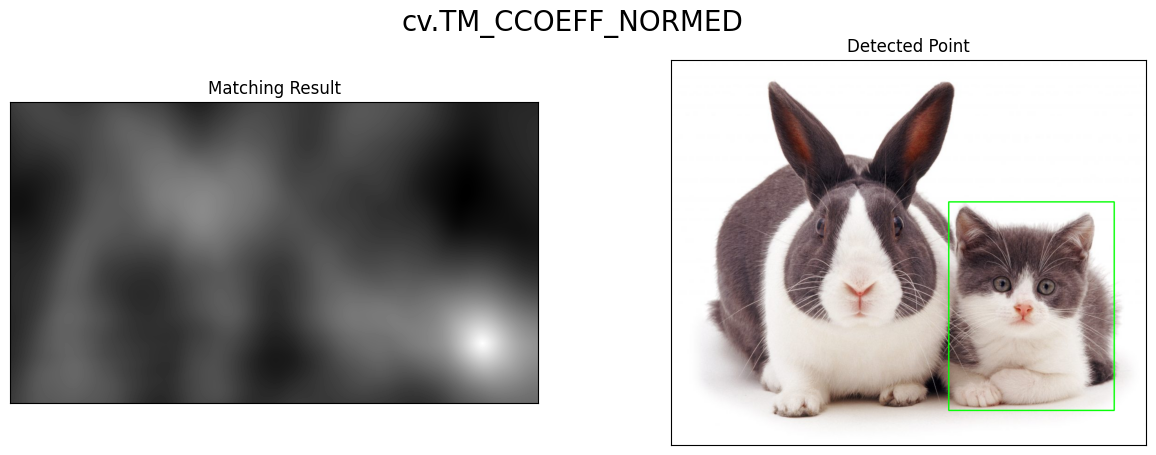

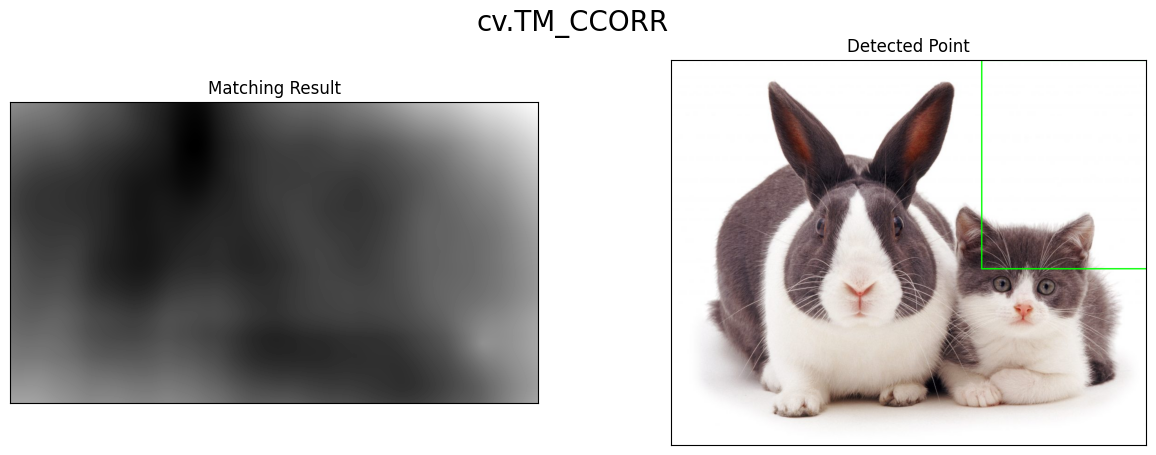

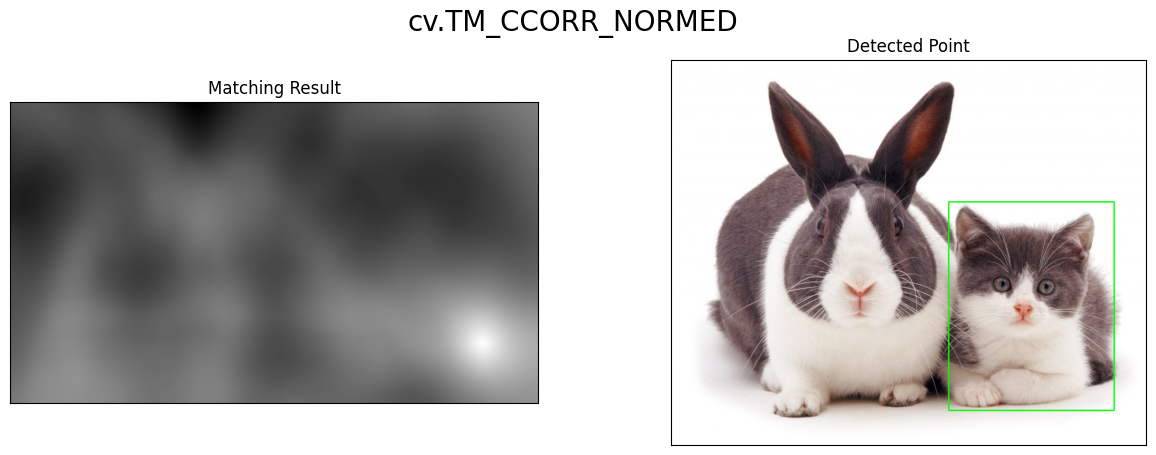

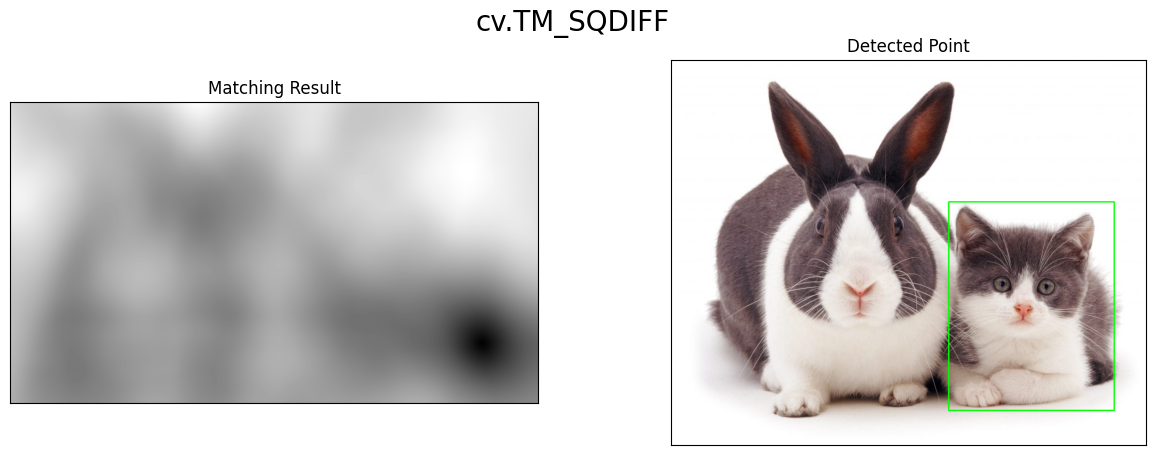

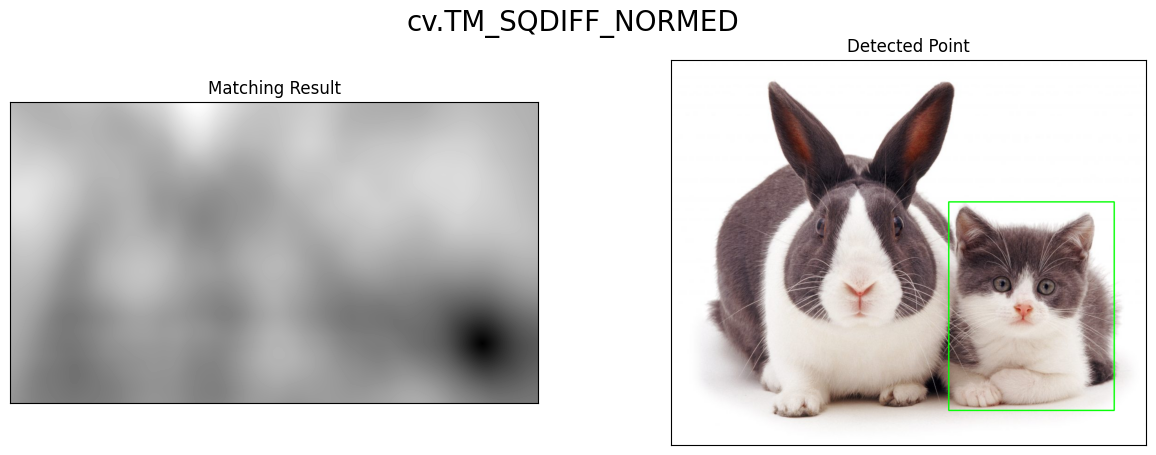

In [4]:
# Main script
image_path = '/content/drive/MyDrive/PCVK/Images/cats_and_bunnies.jpg'
template_path = '/content/drive/MyDrive/PCVK/Images/cats_template.jpg'
img, img_gray, template, template_gray = load_and_convert_to_gray(image_path, template_path)

# Display the input and template images
display_input_and_template(img, template)

template_width, template_height = template_gray.shape[::-1]

# List of template matching methods
methods = [
    'cv.TM_CCOEFF',
    'cv.TM_CCOEFF_NORMED',
    'cv.TM_CCORR',
    'cv.TM_CCORR_NORMED',
    'cv.TM_SQDIFF',
    'cv.TM_SQDIFF_NORMED'
]

# Apply template matching with each method and display results
apply_template_matching(img_gray, template_gray, template_width, template_height, methods)

## **Template Matching tanpa library openCV**

In [5]:
# Fungsi untuk memuat gambar dan template dalam mode grayscale
def load_images(main_image_path, template_path):
    main_image = cv.imread(main_image_path, 0)  # Grayscale
    template = cv.imread(template_path, 0)      # Grayscale
    return main_image, template

# Fungsi untuk menampilkan gambar utama dan template
def display_images(main_image, template):
    fig, axarr = plt.subplots(1, 2, figsize=(10, 4))
    axarr[0].imshow(main_image, cmap='gray')
    axarr[0].set_title("Gambar Utama")
    axarr[1].imshow(template, cmap='gray')
    axarr[1].set_title("Gambar Template")
    plt.show()

# Fungsi untuk menghitung hasil pencocokan template
def perform_template_matching(main_image, template):
    result = match_template(main_image, template)
    return result

# Fungsi untuk menampilkan hasil matching dengan persegi di lokasi yang cocok
def display_matching_results(main_image, template, result, threshold=0.45):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(main_image, cmap=plt.cm.gray)

    # Mendapatkan lokasi-lokasi hasil pencocokan sesuai threshold
    locations = np.where(result >= threshold)

    # Mendapatkan dimensi dari template
    height, width = template.shape

    # Menggambar persegi di setiap lokasi kecocokan yang ditemukan
    for loc in zip(*locations[::-1]):  # Membalik urutan koordinat (y, x) menjadi (x, y)
        rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=1)
        ax.add_patch(rect)

    plt.title("Hasil Matching")
    plt.show()

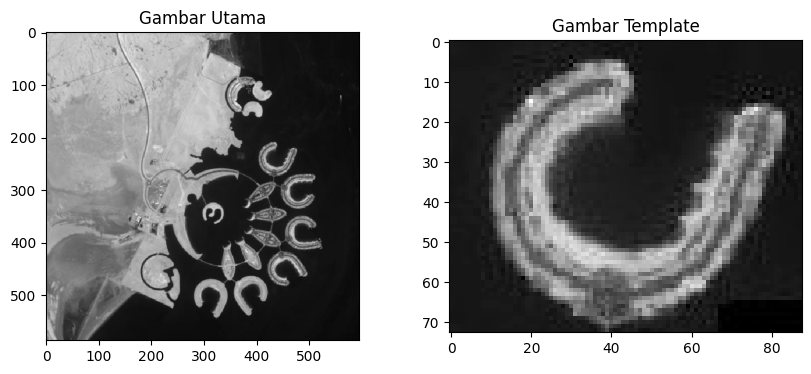

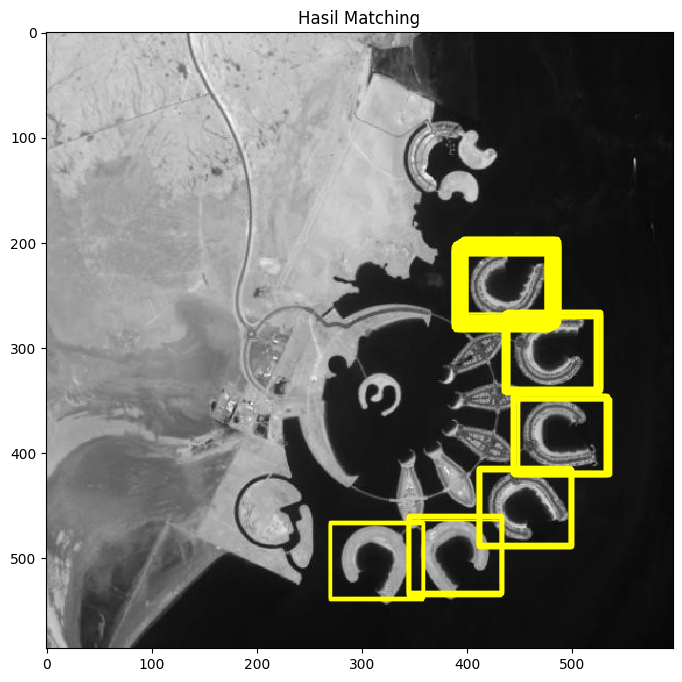

In [6]:
# Jalankan seluruh proses
main_image_path = '/content/drive/MyDrive/PCVK/Images/bahrain.jpg'
template_path = '/content/drive/MyDrive/PCVK/Images/bahrain-template.jpg'

# Muat dan tampilkan gambar
main_image, template = load_images(main_image_path, template_path)
display_images(main_image, template)

# Lakukan pencocokan template dan tampilkan hasil
result = perform_template_matching(main_image, template)
display_matching_results(main_image, template, result)

## **Metode Edge Detection**
Metode yang digunakan
<br>
1. Sobel edge detection
2. Canny edge detection
3. Laplacian edge detection

In [7]:
# Fungsi untuk memuat gambar dan mengonversinya ke grayscale
def load_and_convert_image(image_path):
    image = cv.imread(image_path)
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image, image_gray

# Fungsi untuk melakukan Sobel Edge Detection
def sobel_edge_detection(image_gray):
    sobel_x = cv.Sobel(image_gray, cv.CV_64F, 1, 0, ksize=3)  # Tepi horizontal
    sobel_y = cv.Sobel(image_gray, cv.CV_64F, 0, 1, ksize=3)  # Tepi vertikal
    sobel_combined = cv.magnitude(sobel_x, sobel_y)           # Kombinasi horizontal dan vertikal
    return sobel_combined

# Fungsi untuk melakukan Canny Edge Detection
def canny_edge_detection(image_gray, threshold1=100, threshold2=200):
    canny_edges = cv.Canny(image_gray, threshold1, threshold2)
    return canny_edges

# Fungsi untuk melakukan Laplacian Edge Detection
def laplacian_edge_detection(image_gray):
    laplacian_edges = cv.Laplacian(image_gray, cv.CV_64F)
    laplacian_edges = cv.convertScaleAbs(laplacian_edges)
    return laplacian_edges

# Fungsi untuk menampilkan hasil deteksi tepi
def display_results(image, sobel_edges, canny_edges, laplacian_edges):
    plt.figure(figsize=(12, 6))

    # Tampilkan gambar asli
    plt.subplot(2, 3, 1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    # Tampilkan hasil Sobel Edge Detection
    plt.subplot(2, 3, 2)
    plt.imshow(sobel_edges, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    # Tampilkan hasil Canny Edge Detection
    plt.subplot(2, 3, 3)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    # Tampilkan hasil Laplacian Edge Detection
    plt.subplot(2, 3, 4)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(laplacian_edges, cmap='gray')
    plt.title('Laplacian Edge Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

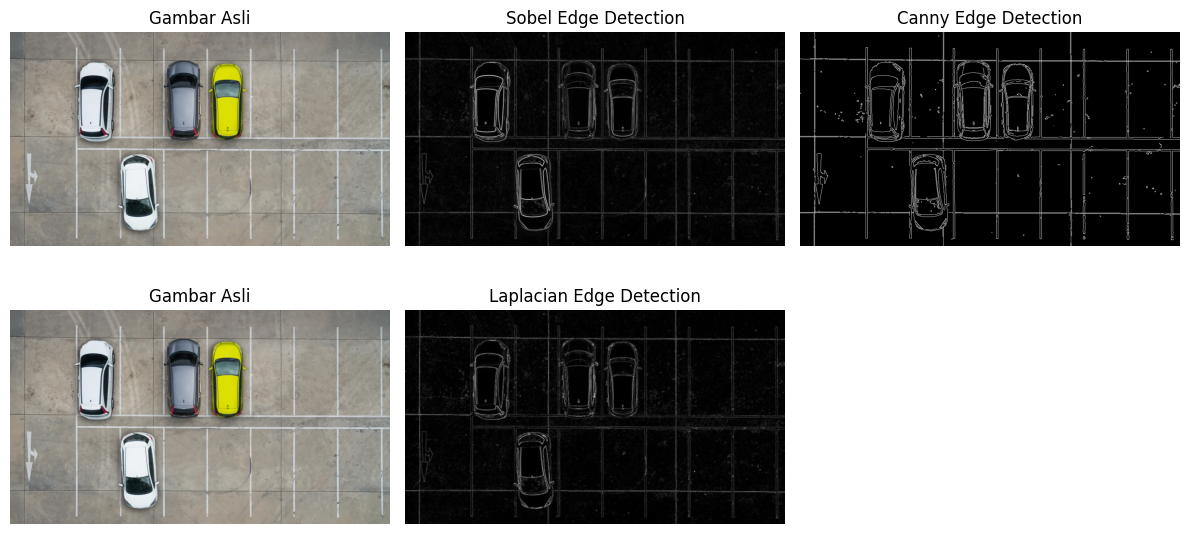

In [8]:
# Main script
image_path = '/content/drive/MyDrive/PCVK/Images/car-park.jpg'
image, image_gray = load_and_convert_image(image_path)

# Dapatkan hasil deteksi tepi dengan setiap metode
sobel_edges = sobel_edge_detection(image_gray)
canny_edges = canny_edge_detection(image_gray)
laplacian_edges = laplacian_edge_detection(image_gray)

# Tampilkan hasil semua metode deteksi tepi
display_results(image, sobel_edges, canny_edges, laplacian_edges)

## **Implementasi metode corner**

metode yang digunakan
<br>
1. Harris corner detection
2. Shi-Tomasi Detection

In [9]:
# Fungsi untuk memuat gambar dan mengonversinya ke grayscale
def load_image(image_path):
    image = cv.imread(image_path)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image, gray_image

# Fungsi untuk Harris Corner Detection
def harris_corner_detection(gray_image, image, blockSize=2, ksize=3, k=0.04, threshold=0.01):
    gray_float = np.float32(gray_image)  # Konversi ke float32
    harris_corners = cv.cornerHarris(gray_float, blockSize, ksize, k)

    # Menandai sudut pada salinan gambar asli
    harris_result = image.copy()
    harris_result[harris_corners > threshold * harris_corners.max()] = [0, 0, 255]  # Sudut dengan warna merah
    return harris_result

# Fungsi untuk Shi-Tomasi Corner Detection
def shi_tomasi_corner_detection(gray_image, image, maxCorners=100, qualityLevel=0.01, minDistance=10):
    corners = cv.goodFeaturesToTrack(gray_image, maxCorners, qualityLevel, minDistance)

    # Menandai setiap sudut yang terdeteksi
    shi_tomasi_result = image.copy()
    if corners is not None:
        for corner in corners:
            x, y = corner.ravel()
            cv.circle(shi_tomasi_result, (int(x), int(y)), 5, (0, 255, 0), -1)  # Sudut dengan warna hijau
    return shi_tomasi_result

# Fungsi untuk menampilkan hasil deteksi sudut
def display_results(harris_result, shi_tomasi_result):
    plt.figure(figsize=(20, 10))

    # Hasil Harris Corner Detection
    plt.subplot(2, 1, 1)
    plt.imshow(cv.cvtColor(harris_result, cv.COLOR_BGR2RGB))
    plt.title('Harris Corner Detection')
    plt.axis('off')

    # Hasil Shi-Tomasi Corner Detection
    plt.subplot(2, 1, 2)
    plt.imshow(cv.cvtColor(shi_tomasi_result, cv.COLOR_BGR2RGB))
    plt.title('Shi-Tomasi Corner Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

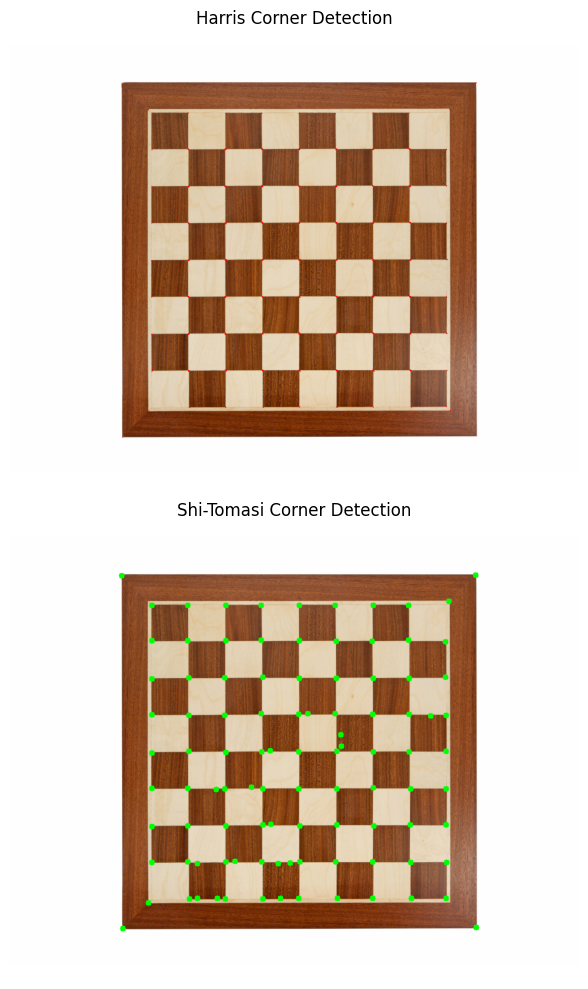

In [10]:
# Main script
image_path = '/content/drive/MyDrive/PCVK/Images/chess-board.jpg'
image, gray_image = load_image(image_path)

# Lakukan deteksi sudut menggunakan Harris dan Shi-Tomasi
harris_result = harris_corner_detection(gray_image, image)
shi_tomasi_result = shi_tomasi_corner_detection(gray_image, image)

# Tampilkan hasil deteksi sudut
display_results(harris_result, shi_tomasi_result)

## **Implementasi metode Hough Transform dengan library openCV**

In [11]:
# Fungsi untuk memuat gambar dan mengonversinya ke grayscale
def load_image(image_path):
    image = cv.imread(image_path)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image, gray_image

# Fungsi untuk deteksi tepi menggunakan Canny dan preprocessing dengan dilasi dan erosi
def preprocess_edges(gray_image, dilate_kernel_size=(3, 3), erode_kernel_size=(5, 5)):
    edges = cv.Canny(gray_image, 90, 150, apertureSize=3)
    edges = cv.dilate(edges, np.ones(dilate_kernel_size, np.uint8), iterations=1)
    edges = cv.erode(edges, np.ones(erode_kernel_size, np.uint8), iterations=1)
    return edges

# Fungsi untuk deteksi garis menggunakan Hough Transform
def hough_transform(edges, rho=1, theta=np.pi/180, threshold=150):
    return cv.HoughLines(edges, rho, theta, threshold)

# Fungsi untuk memfilter garis yang mirip
def filter_similar_lines(lines, rho_threshold=15, theta_threshold=0.1):
    similar_lines = {i: [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            rho_i, theta_i = lines[i][0]
            rho_j, theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    indices = sorted(range(len(lines)), key=lambda x: len(similar_lines[x]), reverse=True)
    line_flags = [True] * len(lines)

    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]:
            continue
        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False

    return [lines[i] for i in range(len(lines)) if line_flags[i]]

# Fungsi untuk menggambar garis pada gambar asli
def draw_lines(image, lines, color=(0, 0, 255), thickness=2):
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv.line(image, (x1, y1), (x2, y2), color, thickness)

# Fungsi untuk menampilkan gambar hasil
def display_image(image, title="Detected Lines"):
    plt.figure(figsize=(20, 10))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

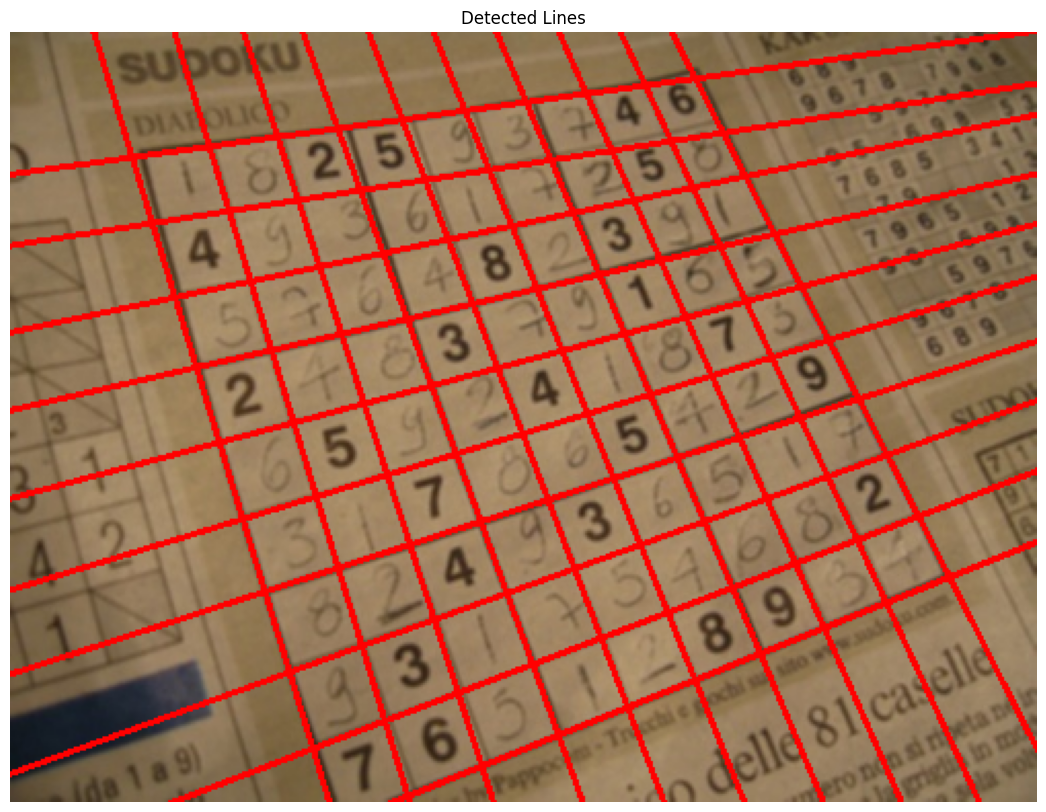

In [12]:
# Main script
image_path = '/content/drive/MyDrive/PCVK/Images/sudoku.jpg'
input_img, gray_img = load_image(image_path)

# Deteksi tepi dan preprocessing
edges = preprocess_edges(gray_img)

# Deteksi garis menggunakan Hough Transform
lines = hough_transform(edges)

# Filter garis yang mirip (aktifkan filter)
if lines is not None:
    filtered_lines = filter_similar_lines(lines)
    draw_lines(input_img, filtered_lines)
else:
    print('No lines were found')

# Tampilkan hasil akhir
display_image(input_img)

## **Implementasi `findContours()` pada openCV**

In [13]:
# Fungsi untuk memuat gambar dan mengonversinya menjadi grayscale
def load_and_convert_to_gray(image_path):
    image = cv.imread(image_path)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image, gray_image

# Fungsi untuk mendeteksi tepi menggunakan Canny Edge Detection
def detect_edges(gray_image, low_threshold=100, high_threshold=200):
    return cv.Canny(gray_image, low_threshold, high_threshold)

# Fungsi untuk menemukan kontur pada citra tepi
def find_contours(edge_image):
    contours, hierarchy = cv.findContours(edge_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    return contours

# Fungsi untuk menggambar kontur pada gambar asli
def draw_contours(image, contours, color=(0, 255, 0), thickness=2):
    contour_img = image.copy()
    cv.drawContours(contour_img, contours, -1, color, thickness)
    return contour_img

# Fungsi untuk menampilkan gambar hasil
def display_image(image, title="Deteksi Kontur"):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

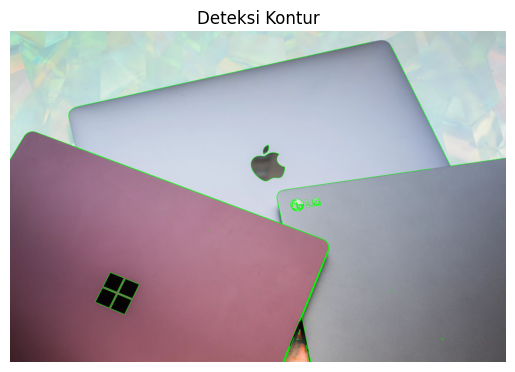

In [14]:
# Main script
image_path = '/content/drive/MyDrive/PCVK/Images/laptop.jpg'
input_img, gray_img = load_and_convert_to_gray(image_path)

# Deteksi tepi pada citra grayscale
edges = detect_edges(gray_img)

# Temukan kontur pada citra hasil deteksi tepi
contours = find_contours(edges)

# Gambar kontur pada gambar asli
contour_img = draw_contours(input_img, contours)

# Tampilkan hasil akhir
display_image(contour_img)

## **Pengayaan materi KTP**

### 1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

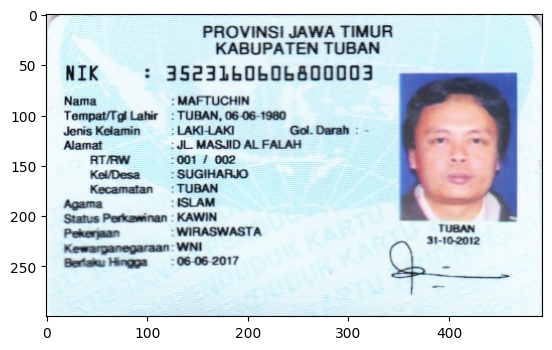

In [15]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp4.png')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

### 2. Muat 2 library berikut sebagai tahapan persiapan

In [16]:
import cv2
import os

### 3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

In [17]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/Images/ktp_dataset"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
 src = cv2.imread(os.path.join(path_plate, name_file))
 blurred = src.copy()
 gray = blurred.copy()

### 4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle dapat direduksi

In [18]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

### 5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan binerisasi citra (thresholding)

In [19]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

168.0 (300, 493)


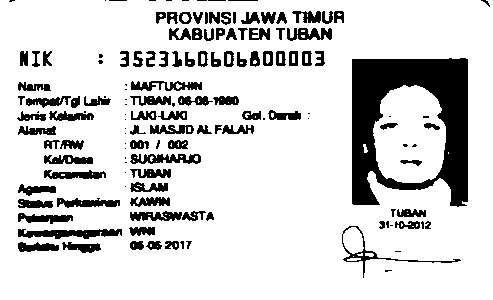

In [20]:
from google.colab.patches import cv2_imshow
cv2_imshow(bw)

### 6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter atau obyek tidak berhimpitan.

In [21]:
# Fungsi untuk menerapkan operasi morfologi dan menampilkan hasil awal dan hasil binerisasi
def apply_morphology_and_show(src, binary_img):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Menampilkan gambar asli
    ax1.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))
    ax1.set_title('Citra awal')

    # Menampilkan hasil deteksi tepi setelah binerisasi
    ax2.imshow(binary_img, cmap='gray')
    ax2.set_title('Hasil Binerisasi')

    plt.show()

### 7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

In [22]:
# Fungsi untuk menerapkan ekstraksi kontur dan menggambar persegi panjang pada karakter/obyek yang sesuai
def contour_extraction_and_display(image_path):
    # Baca gambar dan lakukan Gaussian Blur
    ktp_image = cv.imread(image_path)
    blurred_img = cv.GaussianBlur(ktp_image, (5, 5), 0.5)

    # Ubah ke grayscale dan lakukan binerisasi dengan thresholding Otsu
    gray_image = cv.cvtColor(blurred_img, cv.COLOR_BGR2GRAY)
    _, binary_img = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # Operasi morfologi erosi untuk mencegah objek saling menempel
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (2, 2))
    morphed_img = cv.erode(binary_img, kernel)

    # Tampilkan hasil awal dan binerisasi menggunakan fungsi apply_morphology_and_show
    apply_morphology_and_show(ktp_image, morphed_img)

    # Ekstraksi kontur dan seleksi berdasarkan ukuran dan rasio untuk karakter tertentu
    contours, _ = cv.findContours(morphed_img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        x, y, w, h = cv.boundingRect(contour)
        aspect_ratio = w / h  # Menghitung rasio lebar dan tinggi
        # Seleksi ukuran dan rasio kontur yang sesuai
        if (h >= 40 and w >= 10 and aspect_ratio <= 1) or \
           (h >= 8 and w >= 8 and aspect_ratio <= 10) or \
           (h >= 10 and w >= 7 and aspect_ratio <= 8):
            cv.rectangle(ktp_image, (x, y), (x + w, y + h), (255, 0, 0), thickness=1)

    # Konversi hasil akhir ke RGB untuk ditampilkan
    final_img_rgb = cv.cvtColor(ktp_image, cv.COLOR_BGR2RGB)

    # Tampilkan gambar akhir dengan kontur yang ditandai
    plt.imshow(final_img_rgb)
    plt.title('Hasil Ekstraksi Kontur')
    plt.axis('off')
    plt.show()

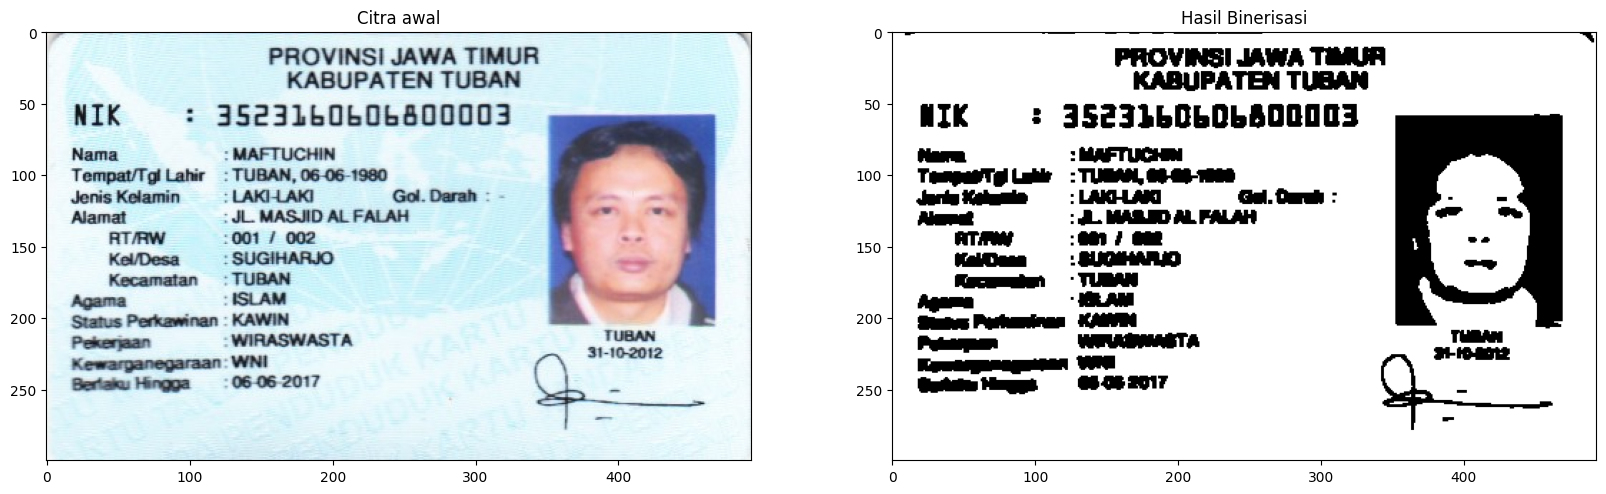

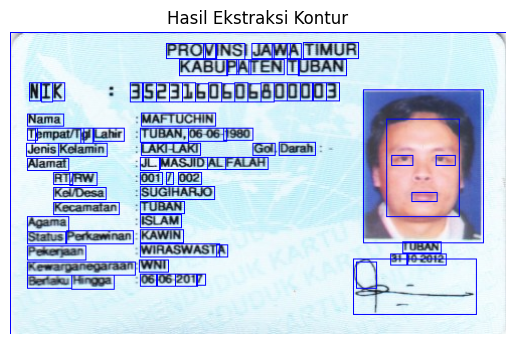

In [23]:
# Path gambar KTP
image_path = '/content/drive/MyDrive/PCVK/Images/ktp4.png'
contour_extraction_and_display(image_path)